# Part II - Ford GoBike Trip Durations, User Type , Age and Genders.
## by Razan Alhasan.

## Investigation Overview


In this section, I delve into the analysis of trip durations, user types, and gender distributions within the Ford GoBike system. The goal is to uncover patterns and trends that help explain how different user demographics engage with the bike-sharing service.

## Dataset Overview and Executive Summary

Dataset Overview
The Ford GoBike dataset provides information on bike trips in the San Francisco Bay Area. Each record includes details such as:

1. **Consistency in Trip Duration**:
   - **Subscribers**: Show more consistent trip durations throughout the day.
   - **Customers**: Exhibit greater variability in trip duration based on the time of day.

2. **Impact of Age on Trip Duration**:
   - **Older Users**: Tend to have longer trips compared to younger users.
   - **Gender Differences**: Some variations in trip duration based on gender.

3. **Station Preference by User Type**:
   - **Subscribers**: Prefer certain stations, likely due to regular commuting routes.
   - **Customers**: Use stations more randomly.

4. **Age Group Differences**:
   - **Trip Duration by Age**: Younger users generally take shorter trips, whereas older users may take longer trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('201902-fordgobike-tripdata-cleaned.csv')

## (Visualization 1): Distribution of Trip Durations

The histograms visualize the distribution of bike trip durations in seconds. This is crucial for understanding the general pattern of trip lengths within the dataset.

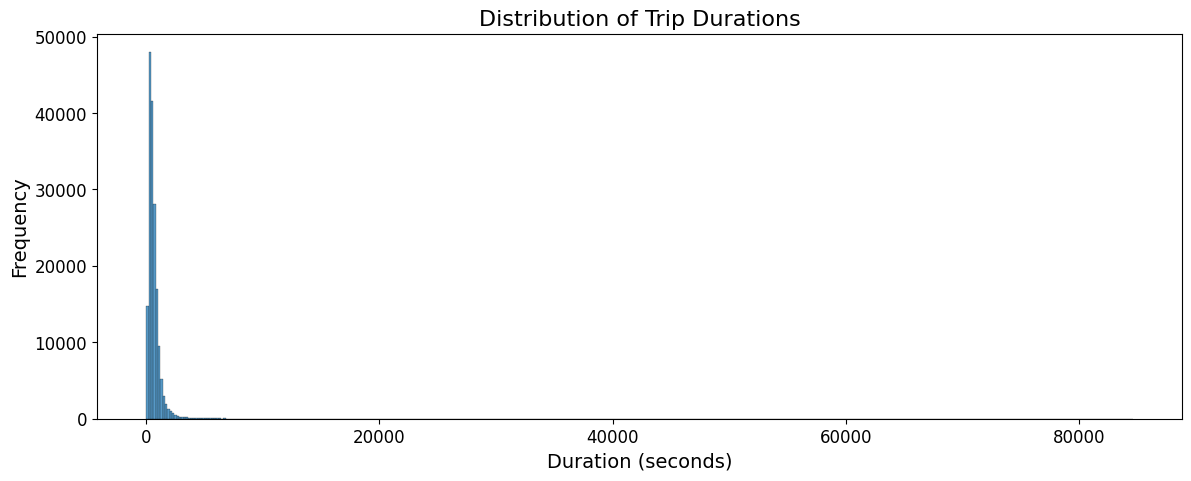

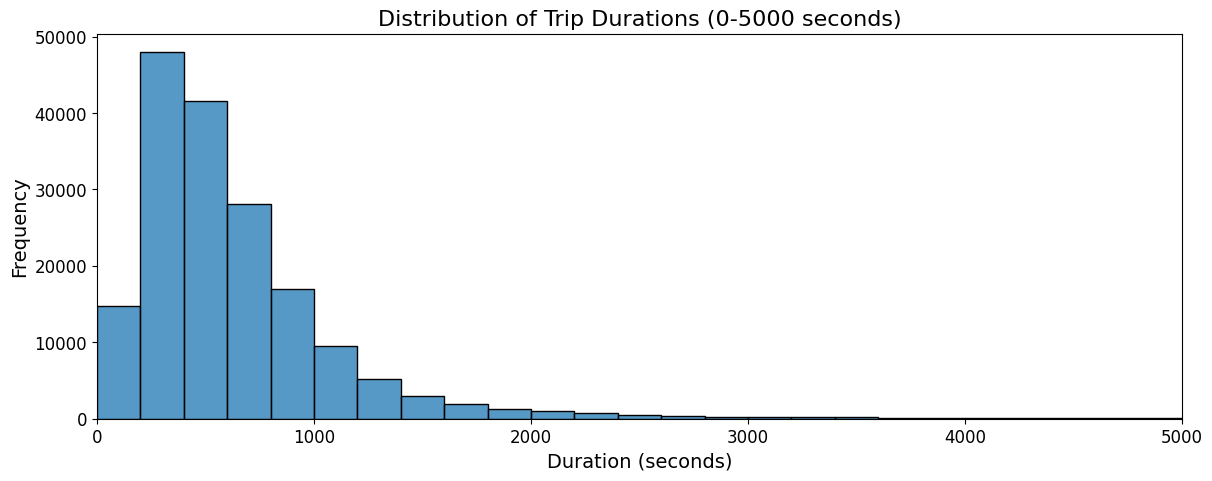

In [3]:
# Plotting a histogram for the full distribution of trip durations
plt.figure(figsize=(14, 5))
binsize = 200
bins = np.arange(0, df_clean['duration_sec'].max() + binsize, binsize)
sns.histplot(df_clean['duration_sec'], bins=bins, kde=False)
plt.title('Distribution of Trip Durations', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plotting a histogram with a focus on trip durations between 0-5000 seconds
plt.figure(figsize=(14, 5))
bins = np.arange(0, 5000 + binsize, binsize)
sns.histplot(df_clean['duration_sec'], bins=bins, kde=False)
plt.title('Distribution of Trip Durations (0-5000 seconds)', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 5000)
plt.show()

* The **first histogram** shows the full distribution of trip durations, providing a comprehensive view of all trips, including those with exceptionally long durations.


* The **second histogram** focuses on trips with durations up to 5000 seconds, which are more typical and relevant for most users. This zoomed-in view allows for better interpretation of the data, highlighting the most common trip lengths.
***

## (Visualization 2): Trip Duration vs. Member Age by Gender and User Type

This scatter plot visualization shows the relationship between the age of members and the duration of their trips, segmented by **gender** and **user type (Customer vs. Subscriber)**. This is important for understanding how age and gender influence trip duration, as well as how usage patterns differ between customers and subscribers.

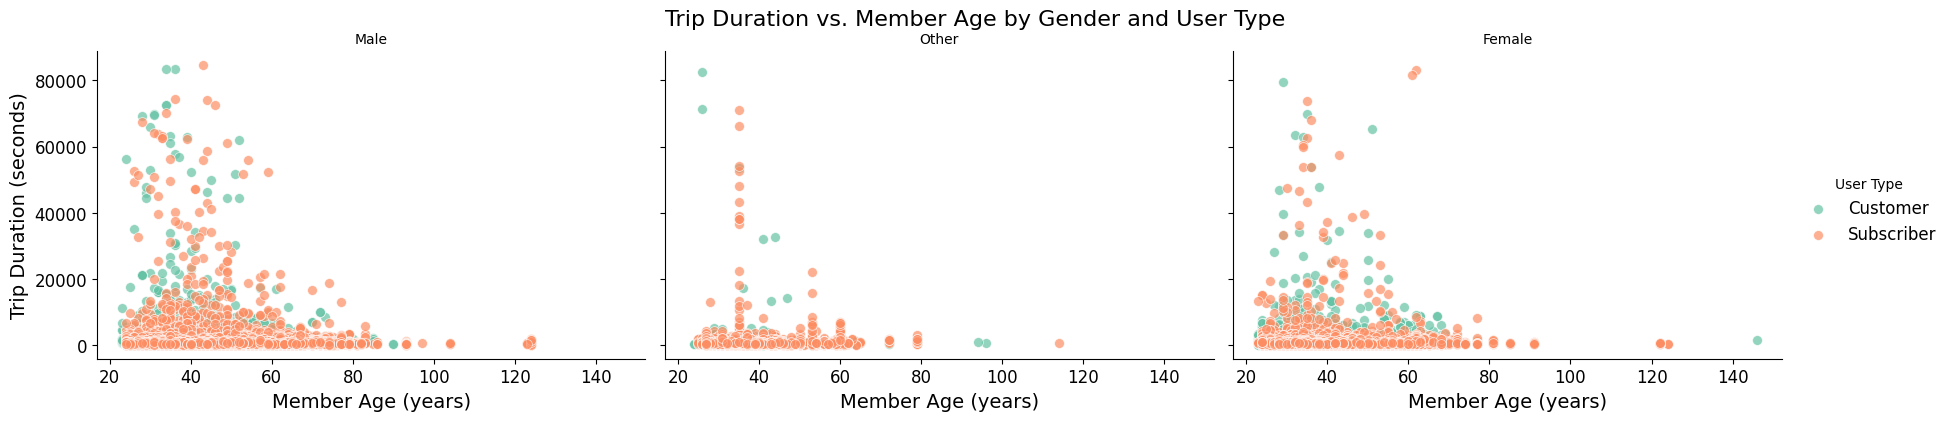

In [4]:
# Create a new column for member age if it doesn't exist
df_clean['member_age'] = 2024 - df_clean['member_birth_year']

# Set up the FacetGrid with enhancements for polish and clarity
g = sns.FacetGrid(df_clean, col="member_gender", hue="user_type", height=4, aspect=1.5, palette='Set2')
g.map(sns.scatterplot, "member_age", "duration_sec", alpha=.7, edgecolor="w", s=50)

# Add legend, axis labels, and titles
g.add_legend(title="User Type", fontsize=12)
g.set_axis_labels("Member Age (years)", "Trip Duration (seconds)", fontsize=14)
g.set_titles("{col_name}", fontsize=14)
g.fig.suptitle('Trip Duration vs. Member Age by Gender and User Type', fontsize=16, y=1.02)

# Improve tick label readability
for ax in g.axes.flat:
    ax.tick_params(labelsize=12)

# Show plot
plt.show()

* The scatter plots for each gender reveal that younger members generally take shorter trips, with some variation in trip duration as age increases.
* Differences between subscribers and customers are visible, with customers often taking longer trips.
* The facet grid allows for easy comparison across gender categories, highlighting any gender-specific trends in trip duration and age.

## (Visualization 3): Trip Duration vs. Member Age

This scatter plot illustrates the relationship between the age of bike-share members and the duration of their trips. Understanding this relationship helps in analyzing how age influences trip duration, which can reveal patterns related to different age groups' usage of the bike-share service.

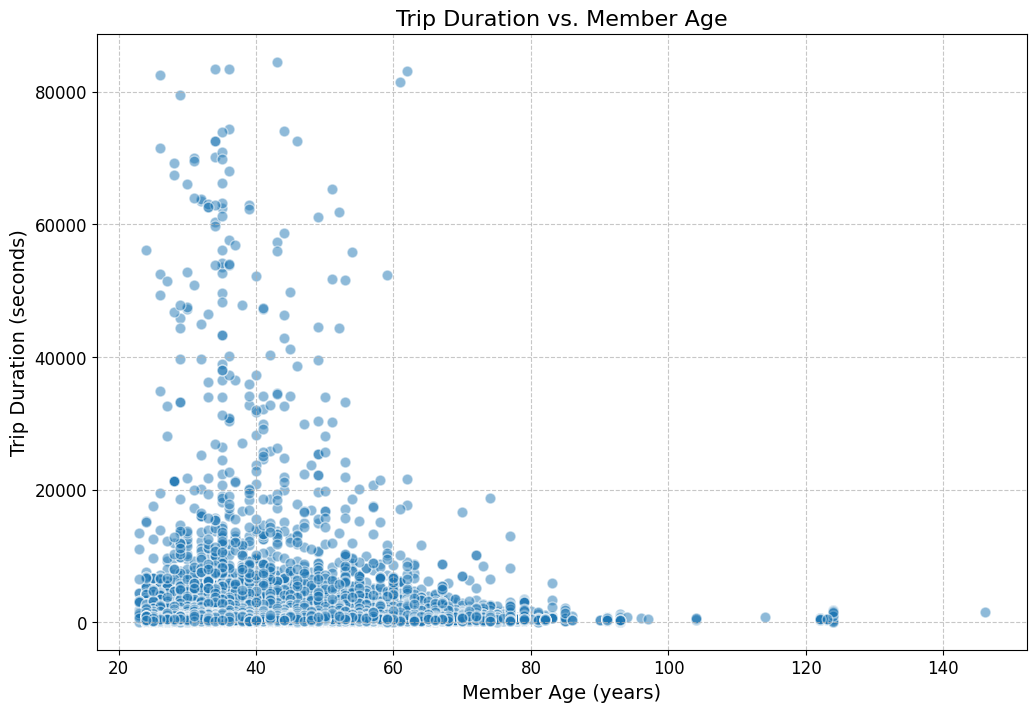

In [5]:
# Get the current year
current_year = datetime.now().year

# Calculate member age
df_clean['member_age'] = current_year - df_clean['member_birth_year']

# Plot scatter plot with enhancements
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['member_age'], df_clean['duration_sec'], alpha=0.5, edgecolor='w', s=60)
plt.title('Trip Duration vs. Member Age', fontsize=16)
plt.xlabel('Member Age (years)', fontsize=14)
plt.ylabel('Trip Duration (seconds)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


* The scatter plot shows a general trend where younger members tend to take shorter trips, while older members have a wider range of trip durations.
* This might suggest that younger users are more likely to use the service for quick errands or commutes, while older users might take longer trips.

### Conclusion for Visualizations

1. **Trip Duration Distribution**:
   - **Insight**: Most bike trips are short, under 5000 seconds (~83 minutes). This suggests the service is used for brief commutes or errands.
   - **Implication**: Optimize service and station placement to cater to these common trip durations.

2. **Trip Duration vs. Member Age by Gender and User Type**:
   - **Insight**: Younger members generally take shorter trips, while older members show more varied trip durations. Customers tend to take longer trips than subscribers.
   - **Implication**: Tailor marketing and service features based on age and user type to enhance satisfaction and retention.

3. **Trip Duration vs. Member Age**:
   - **Insight**: Younger users typically take shorter trips, while older users have a wider range of trip durations.
   - **Implication**: Use this understanding to better address the needs of different age groups with targeted service options.